In [251]:
from __future__ import print_function
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf

from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format


In [265]:
! ls

aa.ipynb    equipment-success.ipynb		mlcc-exercises
demo.ipynb  equipment_success_201810121529.csv	mlcc-exercises_en.zip


In [270]:
equipment_success_dataframe = pd.read_csv("./equipment_success.csv", sep=",")
equipment_success_dataframe.describe()

,patient_id,center_id,months_since_equipped,average_loss,high_loss,low_loss,eq_average_loss,eq_high_loss,eq_low_loss,id,age_in_months_at_equipped_start
count,252940.0,252940.0,252940.0,203853.0,252940.0,252940.0,214851.0,252940.0,252940.0,252940.0,200171.0
mean,174079.2,426.2,21.8,57.0,54.4,41.0,35.0,37.5,30.4,652416.5,831.0
std,63641.3,413.7,27.7,21.3,29.2,28.2,9.9,10.9,11.5,73017.6,228.0
min,51.0,2.0,0.0,-10.0,-10.0,-10.0,-1.2,-10.0,-10.0,525947.0,0.0
25%,138502.0,57.0,1.0,42.5,42.1,23.8,28.8,30.7,23.3,589181.8,759.0
50%,176129.0,240.0,10.0,52.5,56.2,37.5,33.8,36.0,30.0,652416.5,878.0
75%,222135.0,828.0,34.0,66.2,70.0,55.0,39.0,42.5,36.2,715651.2,966.0
max,288723.0,1390.0,215.0,125.0,126.0,125.0,120.0,120.0,117.5,778886.0,1559.0


In [425]:
equipment_success_dataframe['valid'] = (equipment_success_dataframe['average_loss'].apply(lambda x : not math.isnan(x) and x > 20 and x < 90) & 
                                       equipment_success_dataframe['eq_average_loss'].apply(lambda x : not math.isnan(x)) &
                                       equipment_success_dataframe['high_loss'].apply(lambda x : not math.isnan(x)) &
                                       equipment_success_dataframe['low_loss'].apply(lambda x : not math.isnan(x)) &
                                       equipment_success_dataframe['months_since_equipped'].apply(lambda x : x < 24) &
                                       equipment_success_dataframe['age_in_months_at_equipped_start'].apply(lambda x : not math.isnan(x) and x < 12*90 and x > 12*20))

In [426]:
equipment_success_dataframe['age'] = equipment_success_dataframe['age_in_months_at_equipped_start']/12

In [545]:
equipment_success = equipment_success_dataframe.query('valid == True').copy()
equipment_success

,patient_id,center_id,ears,months_since_equipped,average_loss,high_loss,low_loss,eq_average_loss,eq_high_loss,eq_low_loss,id,age_in_months_at_equipped_start,gender,age,valid
2,124276,315,BIN,0,45.0,57.1,27.5,33.8,43.6,21.2,526528,1021.0,NaN,85.1,True
3,131222,315,BIN,1,31.2,29.3,31.2,21.2,25.0,20.0,526529,799.0,NaN,66.6,True
6,142932,315,BIN,5,23.8,34.3,11.2,20.0,25.0,11.2,526532,822.0,NaN,68.5,True
8,136845,315,BIN,5,41.2,47.9,36.2,32.5,40.0,27.5,526534,782.0,NaN,65.2,True
9,170118,315,R,18,55.0,67.9,38.0,41.2,45.8,37.5,526535,551.0,NaN,45.9,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252931,247335,1226,L,0,81.2,80.7,68.0,28.8,28.8,26.7,778878,389.0,male,32.4,True
252932,247335,1226,L,6,81.2,80.7,68.0,26.2,26.0,23.8,778879,389.0,male,32.4,True
252934,246334,1226,R,0,40.0,43.6,35.0,58.8,59.0,55.0,778881,795.0,male,66.2,True
252937,262353,1226,L,4,33.8,38.6,42.5,17.5,17.0,20.0,778884,845.0,male,70.4,True


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd287dc5a90>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3272b8be0>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2d8be6978>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2d8f79438>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2af9d5908>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2917b23c8>]],
      dtype=object)

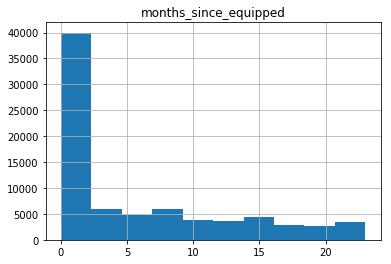

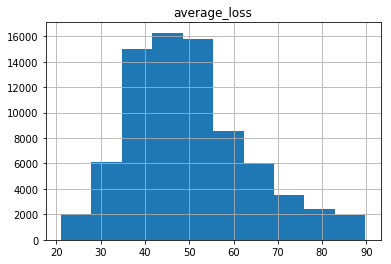

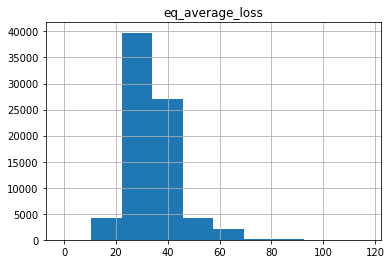

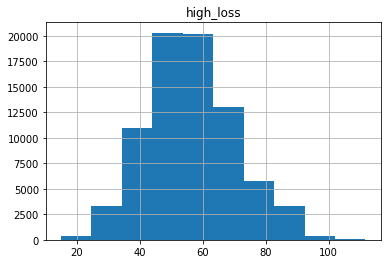

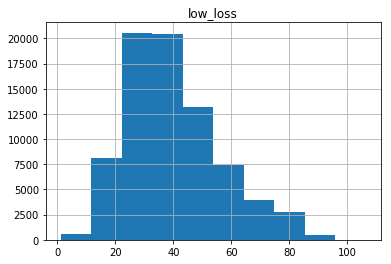

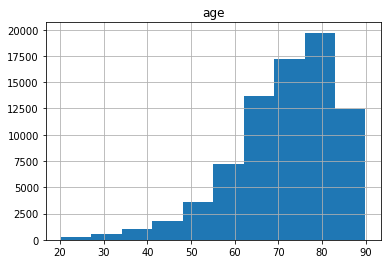

In [546]:
for feature in ['months_since_equipped', 'average_loss', 'eq_average_loss', 'high_loss', 'low_loss', 'age']:
    display.display(equipment_success.hist(feature))

In [547]:
equipment_success.describe()

,patient_id,center_id,months_since_equipped,average_loss,high_loss,low_loss,eq_average_loss,eq_high_loss,eq_low_loss,id,age_in_months_at_equipped_start,age
count,77564.0,77564.0,77564.0,77564.0,77564.0,77564.0,77564.0,77564.0,77564.0,77564.0,77564.0,77564.0
mean,175674.5,467.7,5.7,49.9,56.4,39.9,34.1,36.4,29.4,640072.0,857.6,71.5
std,65608.6,404.3,6.9,13.6,14.0,16.2,9.1,9.6,10.2,74215.9,143.7,12.0
min,496.0,2.0,0.0,21.0,15.0,1.2,-1.2,-0.7,-1.2,525947.0,243.0,20.2
25%,139478.2,134.0,0.0,40.0,46.4,28.3,28.8,30.0,22.5,576299.8,782.0,65.2
50%,180714.0,303.0,2.0,47.5,55.0,37.5,32.8,35.0,28.8,634276.5,880.0,73.3
75%,225428.0,854.0,10.0,57.5,65.0,48.8,38.8,41.0,35.0,694388.2,964.0,80.3
max,288711.0,1390.0,23.0,89.8,111.7,106.2,116.2,114.2,115.0,778886.0,1079.0,89.9


In [548]:
def scaleInner(df, feature):
    stats = df[feature].describe();
    std = stats['std']
    mean = stats['mean']
    df[feature + '_scaled'] = (df[feature] - mean)/std
    return df

def scale(df, features):
    scaledDf = df.copy()
    for feature in features:
        scaleInner(scaledDf, feature)
    return scaledDf        

In [549]:
def preprocess_features(df):
  """Prepares input features from a data set.

  Args:
    df: A Pandas DataFrame expected to contain data
      from the California housing data set.
  Returns:
    A DataFrame that contains the features to be used for the model, including
    synthetic features.
  """
  selected_features = scale(df, ['months_since_equipped', 'average_loss', 'high_loss', 'low_loss', 'age_in_months_at_equipped_start'])
  selected_features = selected_features[
    ["months_since_equipped",
     "average_loss",
     "high_loss",
     "low_loss",
     "age_in_months_at_equipped_start",
     "months_since_equipped_scaled",
     "average_loss_scaled",
     "high_loss_scaled",
     "low_loss_scaled",
     "age_in_months_at_equipped_start_scaled"
    ]]
  processed_features = selected_features


  #processed_features["buck_average_loss"] = bucketized_average_loss
  #processed_features['x1'] = processed_features['average_loss'] * processed_features['high_loss']
  #processed_features['x2'] = processed_features['average_loss'] * processed_features['low_loss']
  #processed_features['x3'] = processed_features['high_loss'] * processed_features['low_loss']
  #processed_features['x4'] = processed_features['average_loss'] * processed_features['months_since_equipped']
  #processed_features['x5'] = processed_features['average_loss'] * processed_features['age_in_months_at_equipped_start']
  #processed_features['x6'] = processed_features['average_loss'] ** 2
  #processed_features['x7'] = processed_features['months_since_equipped'] ** 2
  #processed_features['x8'] = processed_features['age_in_months_at_equipped_start'] ** 2
  
  return processed_features

def preprocess_targets(df):
  """Prepares target features (i.e., labels) from a data set.

  Args:
    df: A Pandas DataFrame expected to contain data
      from the California housing data set.
  Returns:
    A DataFrame that contains the target feature.
  """
  output_targets = pd.DataFrame()
  #output_targets['eq_average_loss'] = df['eq_average_loss'] 
  #output_targets['distance_from_target'] = ((df['eq_average_loss'] - df['average_loss']/2))
  output_targets['target_reached'] = (df['eq_average_loss'] < df['average_loss']/2).astype('float')
    

  #output_targets['distance_from_target'] = ((df['eq_average_loss'] - df['average_loss']/2).apply (lambda x : max(x,0)))

  return output_targets

In [550]:
equipment_success = equipment_success.sample(frac=1)
equipment_success.describe()

,patient_id,center_id,months_since_equipped,average_loss,high_loss,low_loss,eq_average_loss,eq_high_loss,eq_low_loss,id,age_in_months_at_equipped_start,age
count,77564.0,77564.0,77564.0,77564.0,77564.0,77564.0,77564.0,77564.0,77564.0,77564.0,77564.0,77564.0
mean,175674.5,467.7,5.7,49.9,56.4,39.9,34.1,36.4,29.4,640072.0,857.6,71.5
std,65608.6,404.3,6.9,13.6,14.0,16.2,9.1,9.6,10.2,74215.9,143.7,12.0
min,496.0,2.0,0.0,21.0,15.0,1.2,-1.2,-0.7,-1.2,525947.0,243.0,20.2
25%,139478.2,134.0,0.0,40.0,46.4,28.3,28.8,30.0,22.5,576299.8,782.0,65.2
50%,180714.0,303.0,2.0,47.5,55.0,37.5,32.8,35.0,28.8,634276.5,880.0,73.3
75%,225428.0,854.0,10.0,57.5,65.0,48.8,38.8,41.0,35.0,694388.2,964.0,80.3
max,288711.0,1390.0,23.0,89.8,111.7,106.2,116.2,114.2,115.0,778886.0,1079.0,89.9


In [552]:
total_samples = math.floor(equipment_success.count()['ears'] /10 )
examples = preprocess_features(equipment_success)
targets = preprocess_targets(equipment_success)

training_test_ratio = 0.8
training_samples = math.floor(total_samples*0.8)
validation_samples = total_samples - training_samples

[training_samples, validation_samples]

[6204, 1552]

In [553]:
examples

,months_since_equipped,average_loss,high_loss,low_loss,age_in_months_at_equipped_start,months_since_equipped_scaled,average_loss_scaled,high_loss_scaled,low_loss_scaled,age_in_months_at_equipped_start_scaled
44973,18,46.2,50.0,35.0,979.0,1.8,-0.3,-0.5,-0.3,0.8
204410,1,70.0,75.0,71.7,777.0,-0.7,1.5,1.3,2.0,-0.6
124238,15,78.8,74.3,89.0,1032.0,1.4,2.1,1.3,3.0,1.2
210070,8,62.5,70.0,52.0,830.0,0.3,0.9,1.0,0.7,-0.2
227321,8,35.0,42.9,22.0,788.0,0.3,-1.1,-1.0,-1.1,-0.5
...,...,...,...,...,...,...,...,...,...,...
120984,5,41.2,55.7,22.5,973.0,-0.1,-0.6,-0.0,-1.1,0.8
229636,0,28.8,18.3,48.8,484.0,-0.8,-1.6,-2.7,0.5,-2.6
112592,0,48.8,60.0,41.7,994.0,-0.8,-0.1,0.3,0.1,0.9
227031,0,63.8,68.6,63.8,911.0,-0.8,1.0,0.9,1.5,0.4


In [554]:
targets.describe()

,target_reached
count,77564.0
mean,0.1
std,0.3
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,1.0


In [556]:
training_examples = examples.head(training_samples).copy()

In [557]:
validation_examples = examples.tail(validation_samples).copy()

In [558]:
training_targets = targets.head(training_samples)

In [559]:
validation_targets = targets.tail(validation_samples)

In [560]:
training_targets.describe()

,target_reached
count,6204.0
mean,0.1
std,0.3
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,1.0


In [561]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model of multiple features.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [570]:
def construct_feature_columns():
  """Construct the TensorFlow Feature Columns.

  Args:
    input_features: The names of the numerical input features to use.
  Returns:
    A set of feature columns
  """ 
  deafness_levels = [20, 40, 55, 70, 80, 90]
    
  months_since_equipped_scaled = tf.feature_column.numeric_column("months_since_equipped_scaled")
  age_in_months_at_equipped_start_scaled = tf.feature_column.numeric_column("age_in_months_at_equipped_start_scaled")
  average_loss_scaled = tf.feature_column.numeric_column("average_loss_scaled")
  high_loss_scaled = tf.feature_column.numeric_column("high_loss_scaled")
  low_loss_scaled = tf.feature_column.numeric_column("low_loss_scaled")


  average_loss = tf.feature_column.numeric_column("average_loss")
  bucketized_average_loss = tf.feature_column.bucketized_column(
    average_loss, boundaries=deafness_levels)

  high_loss = tf.feature_column.numeric_column("high_loss")
  bucketized_high_loss = tf.feature_column.bucketized_column(
    high_loss, boundaries=deafness_levels)

  low_loss = tf.feature_column.numeric_column("low_loss")
  bucketized_low_loss = tf.feature_column.bucketized_column(
    low_loss, boundaries=deafness_levels)

  average_x_high_x_low = tf.feature_column.crossed_column(set([bucketized_average_loss, bucketized_high_loss, bucketized_low_loss]), hash_bucket_size=1000) 
  average_x_high = tf.feature_column.crossed_column(set([bucketized_average_loss, bucketized_high_loss]), hash_bucket_size=1000) 
  average_x_low = tf.feature_column.crossed_column(set([bucketized_average_loss, bucketized_low_loss]), hash_bucket_size=1000) 

  return set([average_loss_scaled, high_loss_scaled, low_loss_scaled, average_x_high_x_low, average_x_high, average_x_low, months_since_equipped_scaled, age_in_months_at_equipped_start_scaled])

In [571]:
def train_model(
    learning_rate,
    steps,
    batch_size,
    label,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
  """Trains a linear regression model of multiple features.
  
  In addition to training, this function also prints training progress information,
  as well as a plot of the training and validation loss over time.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    training_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for training.
    training_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for training.
    validation_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for validation.
    validation_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for validation.
      
  Returns:
    A `LinearRegressor` object trained on the training data.
  """

  periods = 10
  steps_per_period = steps / periods
  
  # Create a linear regressor object.
  #my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.train.FtrlOptimizer(learning_rate=learning_rate)
 # my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=construct_feature_columns(),
      optimizer=my_optimizer
  )
  
  # Create input functions.
  training_input_fn = lambda: my_input_fn(
      training_examples, 
      training_targets[label], 
      batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(
      training_examples, 
      training_targets[label], 
      num_epochs=1, 
      shuffle=False)
  predict_validation_input_fn = lambda: my_input_fn(
      validation_examples, validation_targets[label], 
      num_epochs=1, 
      shuffle=False)

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("RMSE (on training data):")
  training_rmse = []
  validation_rmse = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period,
    )
    # Take a break and compute predictions.
    training_predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
    training_predictions = np.array([item['predictions'][0] for item in training_predictions])
    
    validation_predictions = linear_regressor.predict(input_fn=predict_validation_input_fn)
    validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
    
    
    # Compute training and validation loss.
    training_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(training_predictions, training_targets))
    validation_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(validation_predictions, validation_targets))
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    training_rmse.append(training_root_mean_squared_error)
    validation_rmse.append(validation_root_mean_squared_error)
  print("Model training finished.")

  # Output a graph of loss metrics over periods.
  plt.ylabel("RMSE")
  plt.xlabel("Periods")
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(training_rmse, label="training")
  plt.plot(validation_rmse, label="validation")
  plt.legend()

  return linear_regressor, training_predictions, training_targets[label]

In [576]:
def train_linear_classifier_model(
    learning_rate,
    steps,
    batch_size,
    label,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
  """Trains a linear classification model.
  
  In addition to training, this function also prints training progress information,
  as well as a plot of the training and validation loss over time.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    training_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for training.
    training_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for training.
    validation_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for validation.
    validation_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for validation.
      
  Returns:
    A `LinearClassifier` object trained on the training data.
  """

  periods = 10
  steps_per_period = steps / periods
  
  # Create a linear classifier object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  #my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)  
  linear_classifier = tf.estimator.LinearClassifier(
      feature_columns=construct_feature_columns(),
      optimizer=my_optimizer
  )
  
  # Create input functions.
  training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets[label], 
                                          batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets[label], 
                                                  num_epochs=1, 
                                                  shuffle=False)
  predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets[label], 
                                                    num_epochs=1, 
                                                    shuffle=False)
  
  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("LogLoss (on training data):")
  training_log_losses = []
  validation_log_losses = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_classifier.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    # Take a break and compute predictions.    
    training_probabilities = linear_classifier.predict(input_fn=predict_training_input_fn)
    training_probabilities = np.array([item['probabilities'] for item in training_probabilities])
    
    validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_fn)
    validation_probabilities = np.array([item['probabilities'] for item in validation_probabilities])
    
    training_log_loss = metrics.log_loss(training_targets, training_probabilities)
    validation_log_loss = metrics.log_loss(validation_targets, validation_probabilities)
    # Occasionally print the current loss.
    print("  period %02d : %0.3f" % (period, training_log_loss))
    # Add the loss metrics from this period to our list.
    training_log_losses.append(training_log_loss)
    validation_log_losses.append(validation_log_loss)
  print("Model training finished.")
  
  # Output a graph of loss metrics over periods.
  plt.ylabel("LogLoss")
  plt.xlabel("Periods")
  plt.title("LogLoss vs. Periods")
  plt.tight_layout()
  plt.plot(training_log_losses, label="training")
  plt.plot(validation_log_losses, label="validation")
  plt.legend()

  return linear_classifier

In [516]:
linear_regressor, predictions, targets = train_model(
    learning_rate=1.5,
    steps=300,
    batch_size=100,
    label='eq_average_loss',
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

Training model...
RMSE (on training data):


KeyError: 'eq_average_loss'

Training model...
LogLoss (on training data):
  period 00 : 0.271
  period 01 : 0.230
  period 02 : 0.217
  period 03 : 0.212
  period 04 : 0.210
  period 05 : 0.209
  period 06 : 0.208
  period 07 : 0.207
  period 08 : 0.207
  period 09 : 0.207
Model training finished.


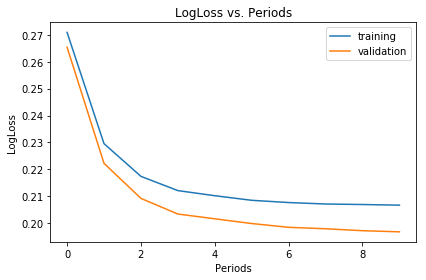

In [580]:
linear_classifier = train_linear_classifier_model(
    learning_rate=0.0005,
    steps=600,
    batch_size=200,
    label='target_reached',
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

In [581]:
predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                  validation_targets["target_reached"], 
                                                  num_epochs=1, 
                                                  shuffle=False)

evaluation_metrics = linear_classifier.evaluate(input_fn=predict_validation_input_fn)

print("AUC on the validation set: %0.2f" % evaluation_metrics['auc'])
print("Accuracy on the validation set: %0.2f" % evaluation_metrics['accuracy'])
evaluation_metrics

AUC on the validation set: 0.87
Accuracy on the validation set: 0.93


{'accuracy': 0.929768,
 'accuracy_baseline': 0.91752577,
 'auc': 0.87184536,
 'auc_precision_recall': 0.52139235,
 'average_loss': 0.19680612,
 'global_step': 600,
 'label/mean': 0.082474224,
 'loss': 0.19680612,
 'precision': 0.6376812,
 'prediction/mean': 0.09073298,
 'recall': 0.34375}

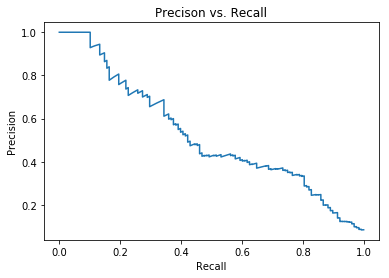

In [582]:
validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_fn)
# Get just the probabilities for the positive class.
validation_probabilities = np.array([item['probabilities'][1] for item in validation_probabilities])

precision, recall, thresholds = metrics.precision_recall_curve(
    validation_targets, validation_probabilities)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precison vs. Recall")
_ = plt.show()

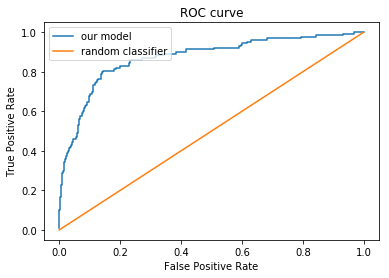

In [583]:
validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_fn)
# Get just the probabilities for the positive class.
validation_probabilities = np.array([item['probabilities'][1] for item in validation_probabilities])

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(
    validation_targets, validation_probabilities)
plt.plot(false_positive_rate, true_positive_rate, label="our model")
plt.plot([0, 1], [0, 1], label="random classifier")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC curve")
_ = plt.legend(loc=2)

In [309]:
 predict_training_input_fn = lambda: my_input_fn(
  training_examples, 
  training_targets['eq_average_loss'], 
  num_epochs=1, 
  shuffle=False)
    
training_predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
training_predictions = np.array([item['predictions'][0] for item in training_predictions])

training_predictions

array([15.81773 , 14.687185, 12.250897, ..., 10.229536, 12.71915 ,
       10.665826], dtype=float32)

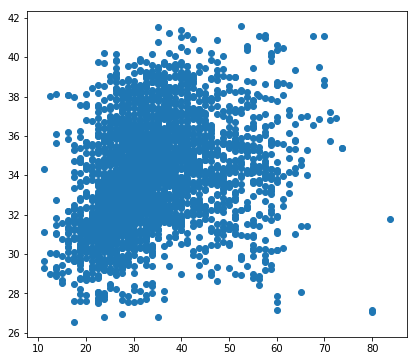

In [331]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(targets, predictions )

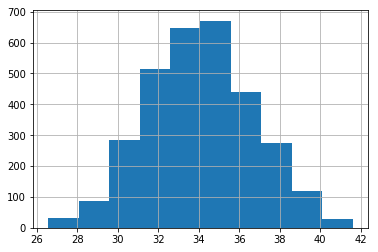

In [332]:
pd.DataFrame({'x': predictions})['x'].hist()

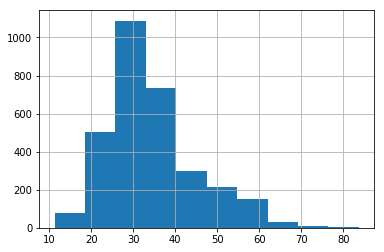

In [333]:
pd.DataFrame({'x': targets})['x'].hist()

In [334]:
pd.DataFrame({'x': (targets - predictions).apply (lambda x: abs(x))})['x'].describe()

count   3102.0
mean       7.6
std        6.7
min        0.0
25%        2.7
50%        5.9
75%       10.3
max       53.0
Name: x, dtype: float64

In [338]:
pd.DataFrame({'x': (targets - 34.4).apply (lambda x: abs(x))})['x'].describe()

count   3102.0
mean       8.1
std        6.7
min        0.4
25%        3.1
50%        6.9
75%       11.9
max       49.4
Name: x, dtype: float64

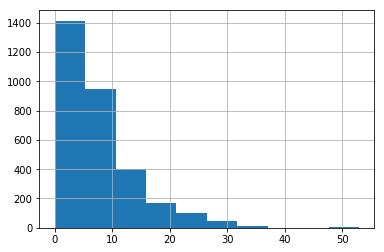

In [335]:
pd.DataFrame({'x': (targets - predictions).apply (lambda x: abs(x))})['x'].hist()

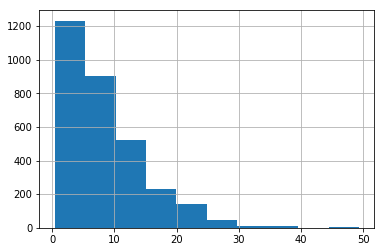

In [337]:
pd.DataFrame({'x': (targets - 34.4).apply (lambda x: abs(x))})['x'].hist()